<a href="https://colab.research.google.com/github/NehalRahate/STOCK-PREDICTION_LSTM/blob/main/StockMarketAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import pandas_datareader as web
plt.style.use('fivethirtyeight')

In [ ]:
import yfinance as yf

# Define the stock symbol and date range
stock_symbol = 'AAPL'
start_date = '2000-01-01'
end_date = '2023-10-18'

# Fetch the data
df = yf.download(stock_symbol, start=start_date, end=end_date)

# Show the data
print(df)


[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2000-01-03    0.936384    1.004464    0.907924    0.999442    0.847207   
2000-01-04    0.966518    0.987723    0.903460    0.915179    0.775779   
2000-01-05    0.926339    0.987165    0.919643    0.928571    0.787131   
2000-01-06    0.947545    0.955357    0.848214    0.848214    0.719014   
2000-01-07    0.861607    0.901786    0.852679    0.888393    0.753073   
...                ...         ...         ...         ...         ...   
2023-10-11  178.199997  179.850006  177.600006  179.800003  179.563431   
2023-10-12  180.070007  182.339996  179.039993  180.710007  180.472244   
2023-10-13  181.419998  181.929993  178.139999  178.850006  178.614685   
2023-10-16  176.750000  179.080002  176.509995  178.720001  178.484863   
2023-10-17  176.649994  178.419998  174.800

In [ ]:
df.shape

(5986, 6)

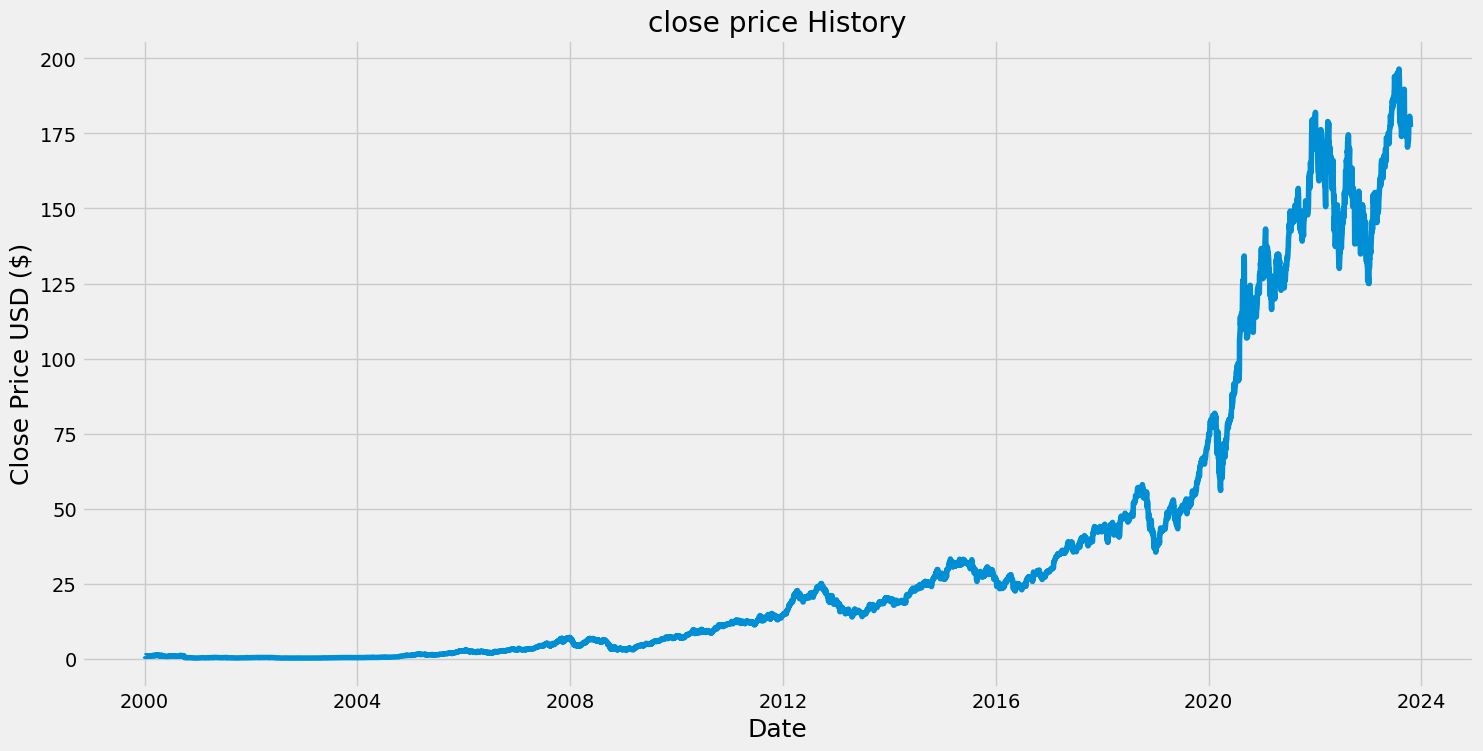

In [ ]:
plt.figure(figsize = (16,8))
plt.title('close price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

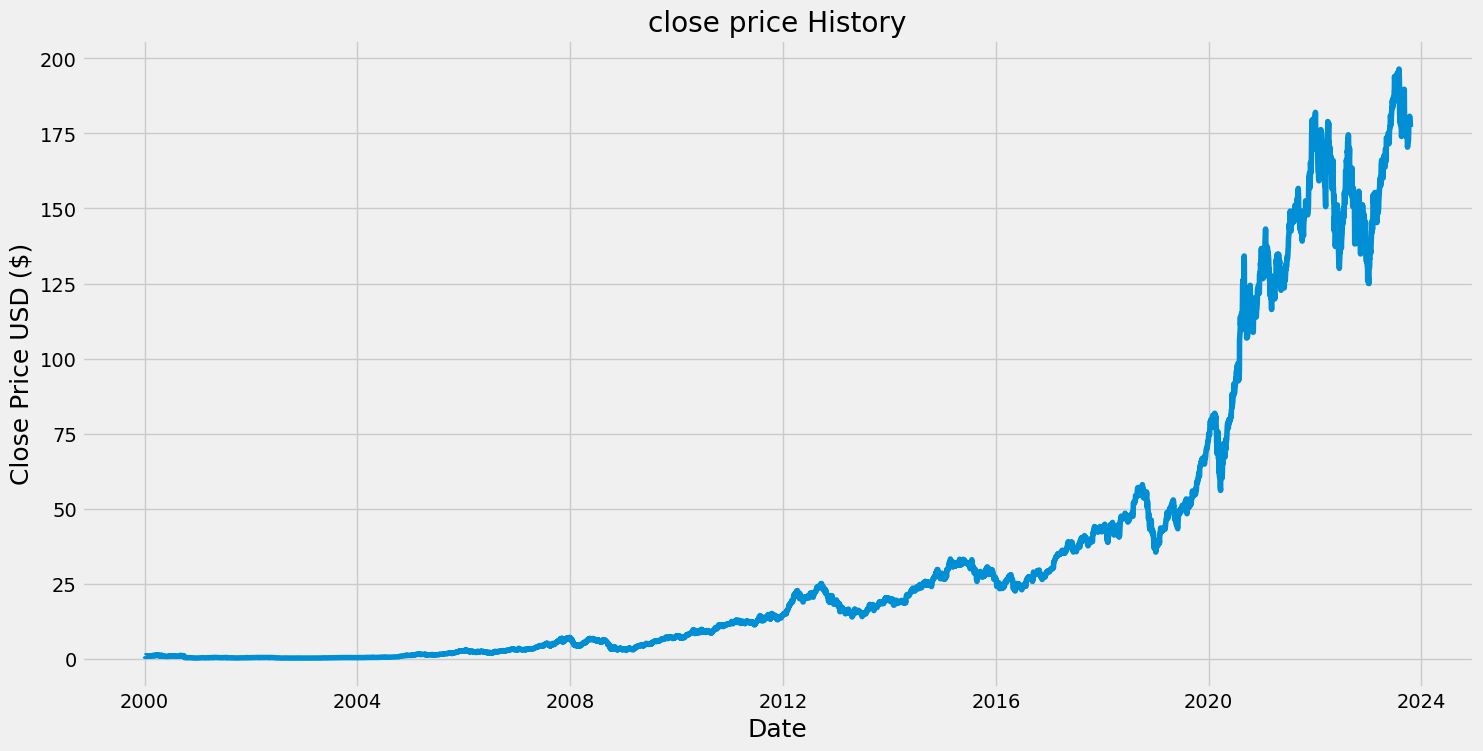

4789

In [ ]:

plt.figure(figsize = (16,8))
plt.title('close price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()
data = df.filter(['Close'])
dataset= data.values
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

In [ ]:
import math
#Create a new dataframe with only the 'Close Column'
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#get the number of row to train the model on
training_data_len = math.ceil(len(dataset)* (.8))
training_data_len


4789

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00389957],
       [0.00347012],
       [0.00353838],
       ...,
       [0.91030285],
       [0.90964028],
       [0.90163885]])

In [ ]:
train_data = scaled_data[0:training_data_len ,:]
x_train = []
y_train = []
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
      print(x_train)
      print(y_train)
      print()

[array([0.00389957, 0.00347012, 0.00353838, 0.00312884, 0.00333361,
       0.00325398, 0.00302646, 0.00277335, 0.00320847, 0.00337627,
       0.00353553, 0.00365498, 0.00397067, 0.00387113, 0.00364076,
       0.00391378, 0.00381993, 0.0038114 , 0.00343031, 0.003527  ,
       0.00336774, 0.00330232, 0.00350709, 0.0037204 , 0.00399626,
       0.00403323, 0.00393085, 0.00397067, 0.00375452, 0.00407589,
       0.00422094, 0.0039991 , 0.00403323, 0.00386828, 0.00398488,
       0.0040958 , 0.00404816, 0.00382847, 0.00395929, 0.00402186,
       0.0047357 , 0.00435745, 0.00463047, 0.00452524, 0.00439726,
       0.00435745, 0.00436882, 0.00452809, 0.00432616, 0.00400479,
       0.0040958 , 0.00433754, 0.00449396, 0.00440295, 0.00494615,
       0.00536706, 0.00523624, 0.00511679, 0.00515661, 0.0051367 ])]
[0.004991659184319]

[array([0.00389957, 0.00347012, 0.00353838, 0.00312884, 0.00333361,
       0.00325398, 0.00302646, 0.00277335, 0.00320847, 0.00337627,
       0.00353553, 0.00365498, 0.0039

In [ ]:
import numpy as np

x_train = np.array(x_train, dtype=object)
y_train = np.array(y_train, dtype=object)


In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)


In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(4729, 60, 1)

In [ ]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True , input_shape =(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#!pip install pydot
#!apt-get install graphviz -y


In [ ]:
#from tensorflow.keras.utils import plot_model


In [ ]:
#Compile the model
model.compile(optimizer='adam' , loss='mean_squared_error')

In [ ]:
import numpy as np

# Convert x_train and y_train to NumPy arrays with compatible data types (e.g., float32)
x_train = np.array(x_train, dtype=np.int64)
y_train = np.array(y_train, dtype=np.int64)

# Then, train your model
model.fit(x_train, y_train, batch_size=1, epochs=1)


4729/4729 [==============================] - 154s 32ms/step - loss: 0.0000e+00


In [ ]:
#create the testing dataset
#create a new array conatining scaled values from index 1542 to 2002
test_data = scaled_data[training_data_len- 60:, : ]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
#convert the data to a numpy array
x_test= np.array(x_test)

In [ ]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [ ]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

38/38 [==============================] - 1s 17ms/step


In [ ]:
#Get the root mean square error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test)**2)
rmse

109.68630172813944

<ipython-input-51-ad1f8c3db508>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


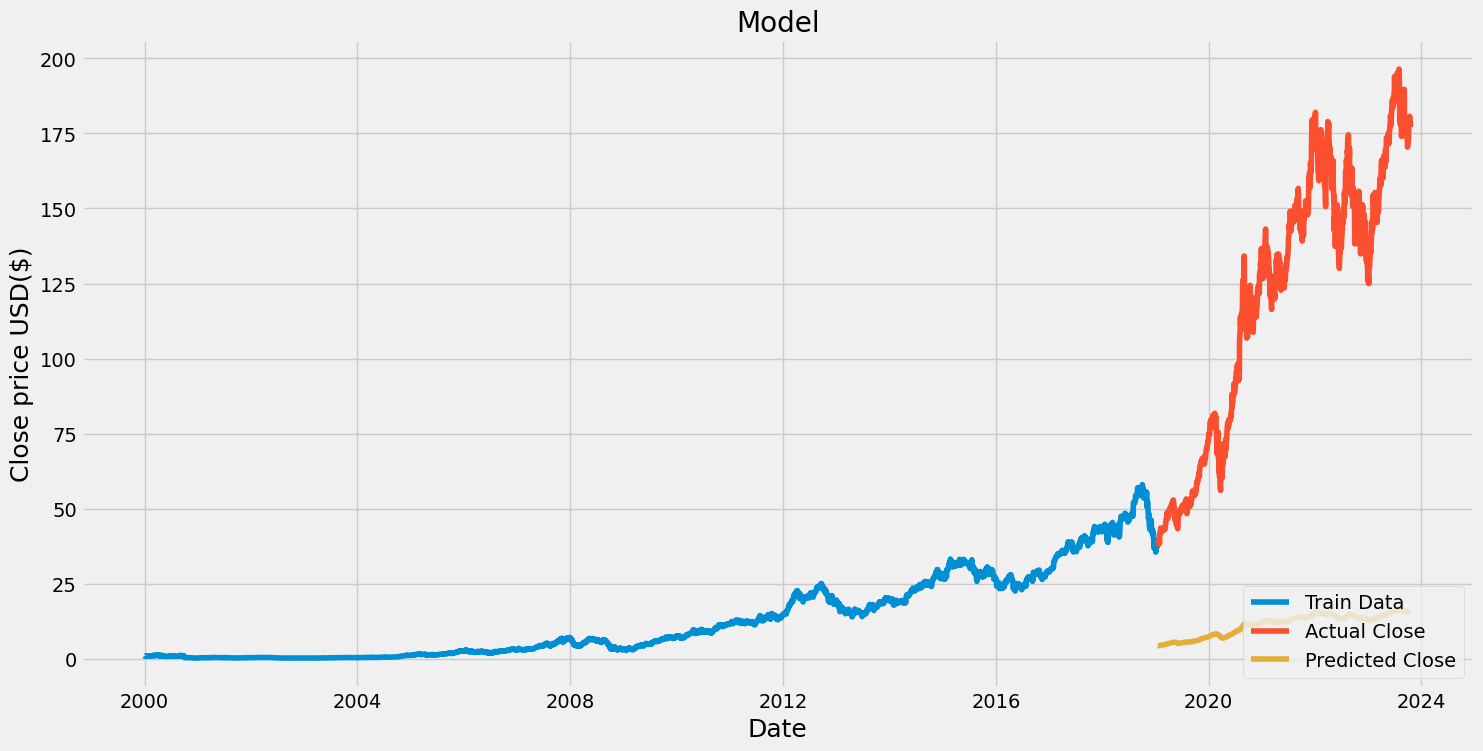

In [ ]:
# Plot the data
train = data[:training_data_len]  # Define 'train' here
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD($)', fontsize=18)

plt.plot(train['Close'], label='Train Data')  # Use 'train' variable here
plt.plot(valid['Close'], label='Actual Close')
plt.plot(valid['Predictions'], label='Predicted Close')

# Add a legend
plt.legend(loc='lower right')

# Show the plot
plt.show()


In [ ]:
valid

,Close,Predictions
Date,,
2019-01-16,38.735001,4.418233
2019-01-17,38.965000,4.408378
2019-01-18,39.205002,4.401847
2019-01-22,38.325001,4.398160
2019-01-23,38.480000,4.392201
...,...,...
2023-10-11,179.800003,15.525677
2023-10-12,180.710007,15.544829
2023-10-13,178.850006,15.565774


In [ ]:
#apple_quote = apple_quote.astype('int', errors='ignore')

# Display the dataframe after conversion
#print("\nDataFrame after converting all columns to integers:")
#print(apple_quote)
#print(apple_quote.dtypes)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Replace 'AAPL' with the desired stock symbol
stock_symbol = 'AAPL'
start_date = '2000-01-01'
end_date = '2023-10-18'

# Fetch the data using yfinance
apple_quote = yf.download(stock_symbol, start=start_date, end=end_date)

# Create a new DataFrame
new_df = apple_quote.filter(['Close'])

# Get the last 60 days' closing price values and convert the DataFrame to an array
last_60_days = new_df[-60:].values

# Scale the data to be values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
last_60_days_scaled = scaler.fit_transform(last_60_days)

# Create an empty list
X_test = []

# Append the past 60 days
X_test.append(last_60_days_scaled)

# Convert the X_test data set to a numpy array
X_test = np.array(X_test)

# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the predicted scaled price
# Assuming you have defined and trained the 'model' somewhere in your code
pred_price = model.predict(X_test)

# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[*********************100%%**********************]  1 of 1 completed
1/1 [==============================] - 0s 124ms/step
[[171.10635]]


In [ ]:
stock_symbol = 'AAPL'
start_date = '2000-01-01'
end_date = '2023-10-18'

# Fetch the data using yfinance
apple_quote = yf.download(stock_symbol, start=start_date, end=end_date)

# Print the 'Close' column of the DataFrame
print(apple_quote['Close'])


[*********************100%%**********************]  1 of 1 completed
Date
2000-01-03      0.999442
2000-01-04      0.915179
2000-01-05      0.928571
2000-01-06      0.848214
2000-01-07      0.888393
                 ...    
2023-10-11    179.800003
2023-10-12    180.710007
2023-10-13    178.850006
2023-10-16    178.720001
2023-10-17    177.149994
Name: Close, Length: 5986, dtype: float64
